# Praktikum 6
---
* Nama: Oktaviana Sadama Nur Azizah
* NIM: 24060121130060
* Dataset: Letter Recognition
* Link: https://raw.githubusercontent.com/sadamapeach/Machine-Learning/main/Letter_Recognition.csv

## Principal Component Analysis (PCA)
Principal Component Analysis (PCA) adalah metode statistik yang digunakan untuk mengubah dataset yang terdiri dari berbagai fitur, menjadi representasi yang lebih sederhana yang disebut sebagai 'komponen utama'. Tujuan dari PCA adalah untuk mereduksi dan mentransformasi data sehingga dapat mempercepat proses pembelajaran mesin pada dataset yang besar.

### Import Libraries

In [546]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

### Reading dan Loading Dataset

In [547]:
# Link dataset
data = "https://raw.githubusercontent.com/sadamapeach/Machine-Learning/main/Letter_Recognition.csv"

# Atribut dataset
names = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

# pd.read_csv = library pandas untuk membaca dataset dari berkas csv
df = pd.read_csv(data, names=names)

In [548]:
# Menampilkan informasi
print(df.shape)
print(df[:10])
print(np.unique(df['letter']))

(20000, 17)
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   
5      S     4    11      5       8      3     8     8      6      9      5   
6      B     4     2      5       4      4     8     7      6      6      7   
7      A     1     1      3       2      1     8     2      2      2      8   
8      J     2     2      4       4      2    10     6      2      6     12   
9      M    11    15     13       9      7    13     2      6      2     12   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9 

In [549]:
# Menampilkan NaN value
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

##### Dataset tidak mengandung nilai null (NaN), sehingga tidak perlu dilakukan data cleaning untuk menghilangkan baris yang memiliki nilai null (NaN).

In [550]:
# Menampilkan informasi tipe data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


##### Features dataset yang akan digunakan dalam PCA sudah menggunakan tipe data int, sehingga tidak perlu dilakukan data cleaning untuk mengkonversi string ke nilai numerik (memenuhi kriteria PCA).

In [551]:
# Reduksi Rows dalam Dataset
df = df.groupby('letter').apply(lambda x: x.sample(n=25)).reset_index(drop=True)

##### Dataset letter_recognition memiliki 20000 rows dan 17 cols, maka tentunya visualisasi proyeksi PCA 2D akan menampilkan banyak titik dengan banyak warna yang tumpang tindih. Oleh karena itu saya mereduksi dataset berdasarkan kriteria atau kluster. Disini saya mengambil 38 sampel dari setiap kelompok 'letter' sehingga totalnya menjadi 650 baris.

### Standarisasi Data
Mean = 0 dan Varians = 1 untuk merapikan data apabila dalam pengelompokan data terdapat standar deviasi yang nilainya terlampau jauh sehingga tidak ada nilai yang mendominasi. PCA sensitif terhadap skala data.

In [552]:
# Mengidentifikasi features yang akan digunakan untuk analisis PCA
features = ['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

# Pemilihan data
x = df.loc[:, features].values
y = df.loc[:,['letter']].values

# Standarisasi data pada fitur x
x = StandardScaler().fit_transform(x)

In [553]:
print(x.shape)
print(y.shape)
print(x[:10])
print(y[:10])

(650, 16)
(650, 1)
[[-0.54567209  1.23906153 -0.09445869  1.14946184 -0.27675371  2.917454
  -1.96496212 -0.25717591 -0.91310874  1.55760265 -2.14585769  0.46306486
  -0.44127742 -1.51671824 -0.30032992  0.76820442]
 [-1.07505545 -0.95460771 -0.56675212 -1.10234707 -0.72092633  1.4771919
  -2.40281792 -1.01529084 -1.31796596  0.29991107 -1.75830351  0.46306486
  -0.44127742 -1.51671824 -0.68920332  0.14637021]
 [-1.07505545 -0.01446375 -0.56675212 -0.20162351 -0.72092633  2.43736663
  -2.40281792 -0.25717591 -0.91310874  1.13837212 -1.75830351  0.46306486
  -0.44127742 -1.51671824 -0.30032992  0.76820442]
 [ 0.51309465  1.86582417 -0.09445869  0.69910006  0.16741891  1.95727926
  -2.40281792 -0.25717591 -1.31796596  1.13837212 -0.98319515  1.43872826
   0.80400618 -3.50702817  0.08854348  1.39003862]
 [-0.54567209  0.92568021 -0.09445869  0.69910006 -0.27675371  0.0369298
  -1.96496212 -1.01529084 -1.31796596 -1.37701104 -1.75830351 -0.51259854
  -0.44127742 -1.51671824 -0.68920332 -0.

##### Setelah sudah dilakukan standarisasi maka data sudah siap untuk diolah dengan algoritma PCA. Proses PCA selanjutnya biasanya melibatkan perhitungan matriks kovarian, ekstraksi nilai eigen, dan proyeksi data ke ruang dimensi yang lebih rendah menggunakan komponen utama yang dihasilkan.

### Proyeksi PCA ke 2D
Diketahui bahwa data asli memiliki 16 kolom. Pada bagian ini kode memproyeksikan data asli menjadi 2 dimensi.

In [554]:
# Membuat objek pca dengan mengatur jumlah komponen utama menjadi 2
pca = PCA(n_components=2)

# Melakukan pca dengan data x untuk menghitung komponen utama dan mengaplikasikan transformasi PCA pada data
principalComponents = pca.fit_transform(x)

# Membuat dataframe baru dari hasil pca dengan memberi nama kolom 'Principal component 1' dan 'Principal component 2'
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])

In [555]:
print(principalDf.shape)
print(principalDf[:10])

(650, 2)
   principal component 1  principal component 2
0               0.819673               3.973158
1              -1.772092               3.427721
2              -0.853416               4.011745
3               1.921403               4.386519
4               0.125356               2.292542
5               1.005136               2.478141
6              -4.123792               2.314611
7               1.057874               3.775046
8              -2.733511               3.284142
9               0.691800               3.301839


In [556]:
# Menggabungkan DataFrame hasil PCA (principalDf) dengan kolom 'letter' dari DataFrame asli (df)
finalDf = pd.concat([principalDf, df[['letter']]], axis=1)

In [557]:
print(finalDf.shape)
print(finalDf[:10])

(650, 3)
   principal component 1  principal component 2 letter
0               0.819673               3.973158      A
1              -1.772092               3.427721      A
2              -0.853416               4.011745      A
3               1.921403               4.386519      A
4               0.125356               2.292542      A
5               1.005136               2.478141      A
6              -4.123792               2.314611      A
7               1.057874               3.775046      A
8              -2.733511               3.284142      A
9               0.691800               3.301839      A


<ipython-input-558-c77096fe9d1d>:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']


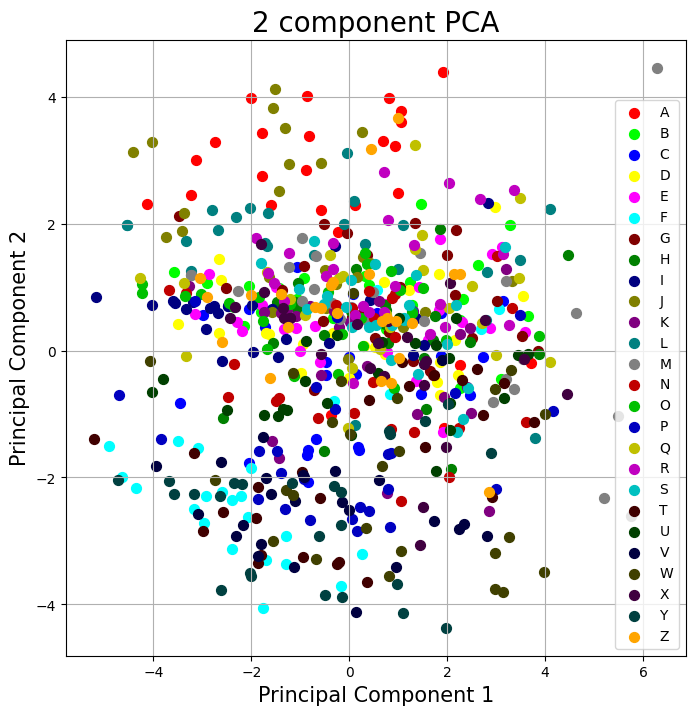

In [558]:
## Visualisasi Proyeksi 2D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'
          , 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V'
          , 'W', 'X', 'Y', 'Z']

# Kode warna RGB untuk setiap kelas
class_colors = [
    (255, 0, 0),   # Merah
    (0, 255, 0),   # Hijau
    (0, 0, 255),   # Biru
    (255, 255, 0), # Kuning
    (255, 0, 255), # Magenta
    (0, 255, 255), # Cyan
    (128, 0, 0),   # Marun
    (0, 128, 0),   # Hijau tua
    (0, 0, 128),   # Biru tua
    (128, 128, 0), # Olive
    (128, 0, 128), # Ungu tua
    (0, 128, 128), # Cyan tua
    (128, 128, 128),  # Abu-abu
    (192, 0, 0),      # Merah tua
    (0, 192, 0),      # Hijau muda
    (0, 0, 192),      # Biru muda
    (192, 192, 0),    # Kuning tua
    (192, 0, 192),    # Magenta tua
    (0, 192, 192),    # Cyan muda
    (64, 0, 0),       # Merah marun
    (0, 64, 0),       # Hijau marun
    (0, 0, 64),       # Biru marun
    (64, 64, 0),      # Olive tua
    (64, 0, 64),      # Ungu marun
    (0, 64, 64),      # Cyan marun
    (255, 165, 0)     # Oranye
]

# Normalisasi nilai warna RGB ke rentang [0, 1]
class_colors = [(r / 255, g / 255, b / 255) for r, g, b in class_colors]

# Setiap iterasi dari loop akan memiliki nilai target (kelas target) dan color (warna yang sesuai)
for target, color in zip(targets, class_colors):
  indicesToKeep = finalDf['letter'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
             , finalDf.loc[indicesToKeep, 'principal component 2']
             , c = color
             , s = 50)

ax.legend(targets)
ax.grid()

### Varians yang Dijelaskan

In [559]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.27047262 0.16660372]
0.43707634454207295


##### Dari keluaran di atas, kita dapat mengamati bahwa principal component 1 menampung 27,05% informasi sedangkan principal component 2 hanya menampung 16.66% informasi. Jika menggunakan dua komponen utama, kita dapat menjelaskan sekitar 43.7% dari variasi dalam data yang mana dapat memberikan pemahaman yang baik tentang struktur dan pola dalam data.
Juga, hal lain yang perlu diperhatikan adalah saat memproyeksikan data 16 dimensi menjadi data dua dimensi, sebanyak 56,3% informasi hilang.

Note:
Karena dataset direduksi menjadi 650 baris menggunakan kluster dimana diambil 25 data random dari setiap label 'letter' maka saat di reload, varians yang dihasilkan akan berbeda-beda. Namun nilai varians dari 650 baris data ini berkisar di angka 43% tidak jauh berbeda apabila menggunakan 20000 data.